In [1]:
#verimizi okumak için gerekli kütüphaneleri import ediyoruz
import pandas as pd
import numpy as np

In [2]:
#verilerimizi okutuyoruz
df= pd.read_excel("Folds5x2_pp.xlsx")
df

,Temperature(°C),Exhaust_Vacuum(Hectogram),Ambient_Pressure(milibar),Relative_Humidity(%),electrical_energy_output(MegaWatt)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
#elektrik çıkışı hariç diğer değerler elektrik çıkışını tahmin etmemize yarayacak
#yani bunlar bağımsız değişkenlerimiz olacak bu yüzden x düzleminden electrik çıkışı sütununu çıkarıyoruz
# tahmin etmemiz gereken bağımlı değişkeni (Y) elektrik enerjisi çıkışı olarak belirliyoruz
x=df.drop(['electrical_energy_output(MegaWatt)'],axis=1).values
y=df[('electrical_energy_output(MegaWatt)')].values

In [4]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [5]:
print(y)
# x ve y değerlerini içi doldu mu diye kontrol ediyoruz

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [6]:
# modelin verimizden öğrenmesi ve test etmesi için verimizi bölüyoruz
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [7]:
# Scikit Learn Kitaplığından LinearRegression modelini import ediyoruz
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [8]:
#Asıl değer ve bizim tahmin ettiğimiz değeri karşılaştırıyoruz
y_pred=ml.predict(x)
prediction=pd.DataFrame({"Actual_Value":y,"Predicton":y_pred}).sort_index()
prediction["Error_Value"]=prediction.Actual_Value-prediction.Predicton
print(prediction)

      Actual_Value   Predicton  Error_Value
0           463.26  467.348201    -4.088201
1           444.37  444.113088     0.256912
2           488.56  483.485474     5.074526
3           446.48  450.539292    -4.059292
4           473.90  471.825208     2.074792
...            ...         ...          ...
9563        460.03  458.650768     1.379232
9564        469.62  472.417037    -2.797037
9565        429.57  432.373843    -2.803843
9566        435.74  442.991706    -7.251706
9567        453.28  449.684667     3.595333

[9568 rows x 3 columns]


In [9]:
#sklearn.metrics kitaplığından r2_score ile modelimizin performansını ölçüyoruz
#R-kare (R^2) skoru, bir regresyon modelinin verilere ne kadar iyi uyduğunu ölçen bir istatistiksel gösterge.
#Değer genellikle 0 ile 1 arasında olup, 1'e ne kadar yakınsa, modelin başarıyla verilere uyduğunu gösterir. 
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9286886187652481

Text(0.5, 1.0, 'Actual vs. Predicted')

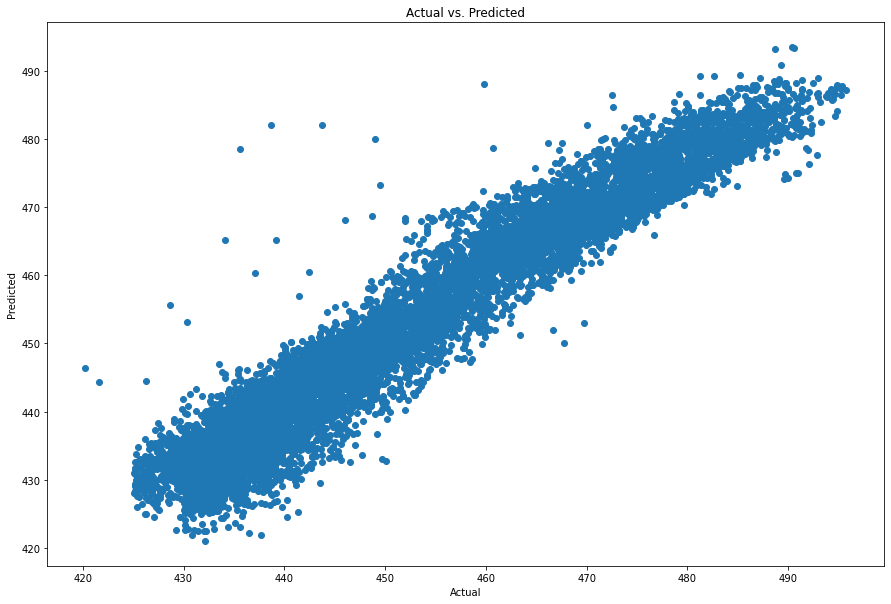

In [10]:
#matplotlib kitaplığıyla grafik oluşturuyoruz x eksenine asıl değerleri 
#y eksenine tahmin ettiğimiz değerleri koyuyoruz
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [11]:
pred_y_df=pd.DataFrame({'Actual Value':y,'Predicted Value':y_pred, 'Difference':y-y_pred})
pred_y_df[0:31]

,Actual Value,Predicted Value,Difference
0,463.26,467.348201,-4.088201
1,444.37,444.113088,0.256912
2,488.56,483.485474,5.074526
3,446.48,450.539292,-4.059292
4,473.90,471.825208,2.074792
5,443.67,442.334466,1.335534
6,467.35,463.985803,3.364197
7,478.42,478.122232,0.297768
8,475.98,472.037108,3.942892
9,477.50,473.017115,4.482885


In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

20.76957348898312